# 1. Beizer Curve

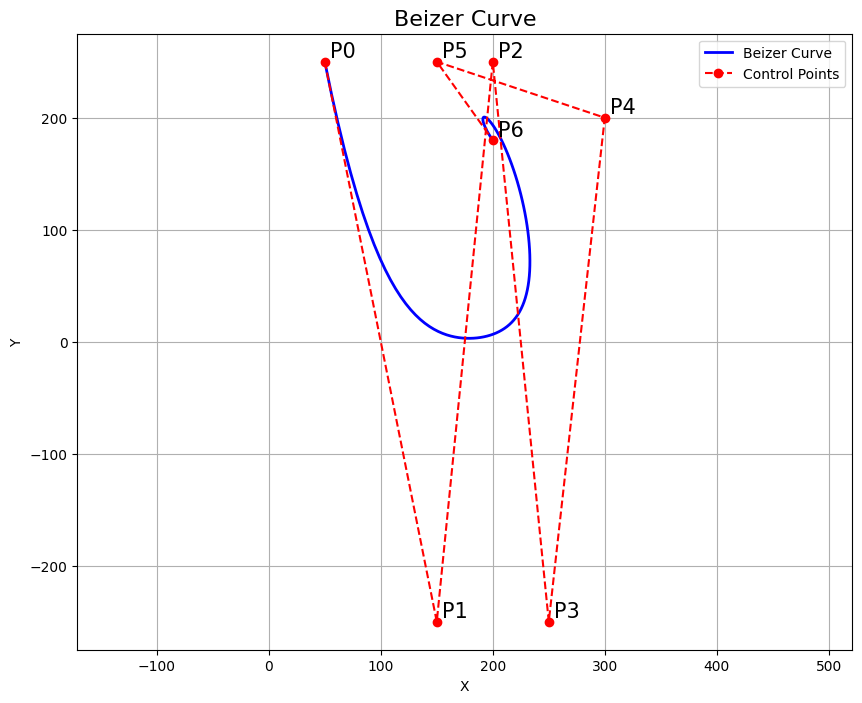

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def beizer_curve(control_points, n_points = 100):
    n = len(control_points)-1
    if n<1:
        raise ValueError("need minimum 2 points")
    control_points = np.array(control_points, dtype=float)
    t = np.linspace(0, 1, n_points)
    curve = np.zeros((n_points, 2))
    for i in range(n+1):
        bernstain_polygon = comb(n,i)*(t**i)*(1-t)**(n-i)
        curve += np.outer(bernstain_polygon, control_points[i])
    return curve
def plot_beizer_curve(curve, control_points):
    control_points = np.array(control_points)
    plt.figure(figsize=(10,8))
    plt.plot(curve[:,0], curve[:,1], 'b-', lw=2, label='Beizer Curve')
    plt.plot(control_points[:,0], control_points[:,1], 'ro--', label='Control Points')
    for i, (x,y) in enumerate(control_points):
        plt.text(x+5, y, f'P{i}', fontsize=15, verticalalignment='bottom')
    plt.title("Beizer Curve", fontsize=16)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

cp=[(50,250),(150,-250),(200,250),(250,-250),(300,200),(150,250),(200,180)]
curve=beizer_curve(cp)
plot_beizer_curve(curve,cp)

# 2. Bresenham Circle Drawing

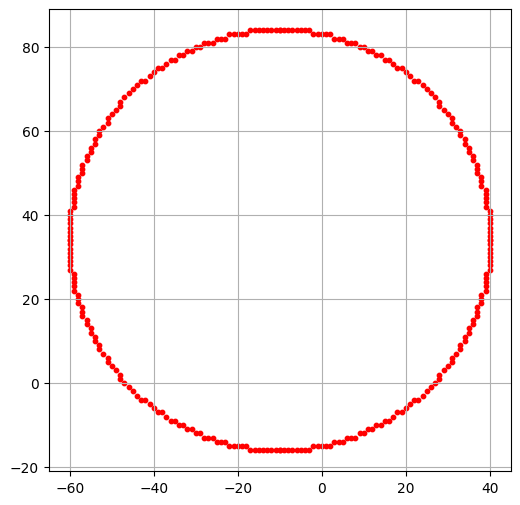

In [10]:
import matplotlib.pyplot as plt
def circle_point(xc,yc,x,y,points):
    points.extend([
        (xc+x, yc+y),
        (xc+x, yc-y),
        (xc-x, yc+y),
        (xc-x, yc-y),
        (xc+y, yc+x),
        (xc+y, yc-x),
        (xc-y, yc+x),
        (xc-y, yc-x)
    ])
def Bresenham_circle(xc, yc, r):
    x, y = 0,r
    points = []
    d = 3-2*r
    while x<=y:
        circle_point(xc,yc,x,y,points)
        if d<0:
            d = d + 4*x + 6
        else:
            d = d + 4*(x-y)+10
            y = y-1
        x = x+1
    return points
xc,yc,r = -10, 34, 50
circle_points = Bresenham_circle(xc,yc,r)
x_vals, y_vals = zip(*circle_points)
plt.figure(figsize=(6,6))
plt.scatter(x_vals, y_vals, color='red', s=10)
plt.gca().set_aspect('equal', 'box')
plt.grid(True)
plt.show()


# 3. Line Clipping

Accepted


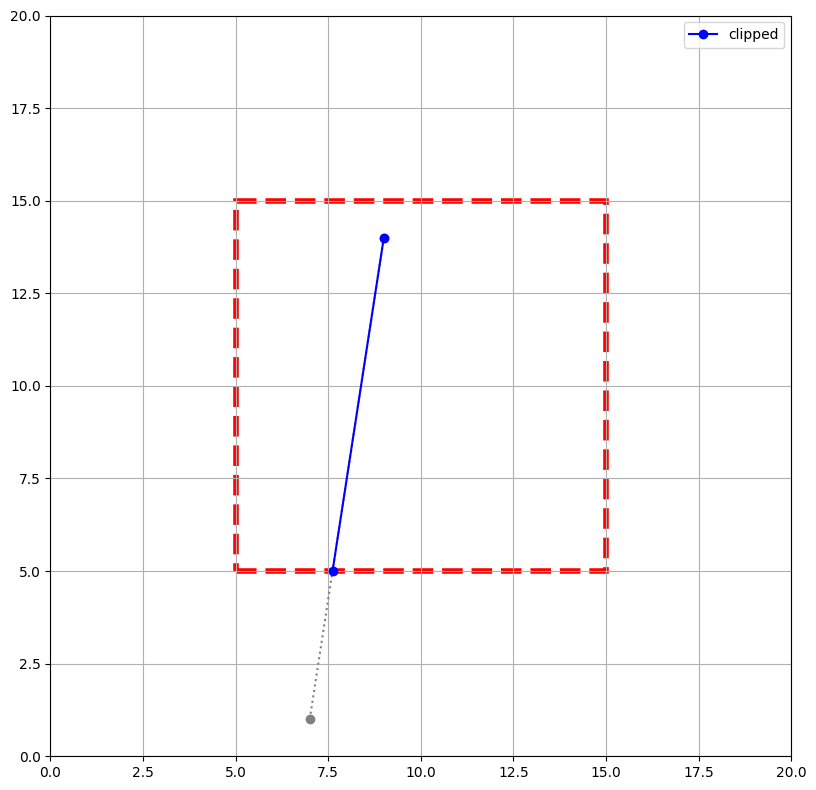

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

inside, left,right,bottom,top=0,1,2,4,8

def compute_outcode(x,y,xmin,ymin,xmax,ymax):
    code = inside
    if x<xmin:
        code|=left
    elif x>xmax:
        code|=right
    elif y<ymin:
        code|=bottom
    elif y>ymax:
        code|=top
    return code

def cohen_sutherland_line_clipping(x1,y1,x2,y2, xmin,ymin, xmax,ymax):
    o1 = compute_outcode(x1,y1,xmin,ymin,xmax,ymax)
    o2 = compute_outcode(x2,y2,xmin,ymin,xmax,ymax)
    accepted = True
    while True:
        if not(o1|o2):
            accepted=True
            break
        elif (o1&o2):
            break
        else:
            out = o1 if o1 else o2
            x,y=0,0
            if out&top:
                x = x1 + (x2-x1)*(ymax-y1)/(y2-y1)
                y = ymax
            elif out&bottom:
                x = x1 + (x2-x1)*(ymin-y1)/(y2-y1)
                y = ymin
            elif out&left:
                y = y1 + (y2-y1)*(xmin-x1)/(x2-x1)
                x = xmin
            elif out&right:
                y = y1 + (y2-y1)*(xmax-x1)/(x2-x1)
                x = xmax
            if out==o1:
                x1,y1 = x, y
                o1 = compute_outcode(x1,y1, xmin,ymin, xmax, ymax)
            else:
                x2,y2 = x,y
                o2 = compute_outcode(x2,y2, xmin, ymin, xmax, ymax)
    return accepted, x1,y1,x2,y2

def visualize(window, line, title="Clipped"):
    fig, ax = plt.subplots(figsize=(10,8))

    xmin,ymin,xmax,ymax = window
    crop_rect = patches.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, linewidth=4, edgecolor='red', facecolor='none', linestyle='--')
    ax.add_patch(crop_rect)

    x1,y1,x2,y2 = line
    ax.plot([x1,x2], [y1,y2], 'gray', linestyle=':', marker='o')

    accepted, clx1, cly1, clx2, cly2 = cohen_sutherland_line_clipping(x1,y1,x2,y2, xmin,ymin,xmax,ymax)
    
    if accepted:
        ax.plot([clx1,clx2], [cly1,cly2], 'blue', marker='o', label="clipped")
        print("Accepted")
    else:
        print("Rejected")
        ax.set_title(title)
    ax.set_xlim(0,20)
    ax.set_ylim(0,20)
    ax.set_aspect('equal', 'box')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    CLIP_WINDOW = (5, 5, 15, 15)
    line_to_clip = (7, 1, 9, 14)
    line_title = "Single Crossing Line"
    visualize(CLIP_WINDOW, line_to_clip, line_title) 

Accepted


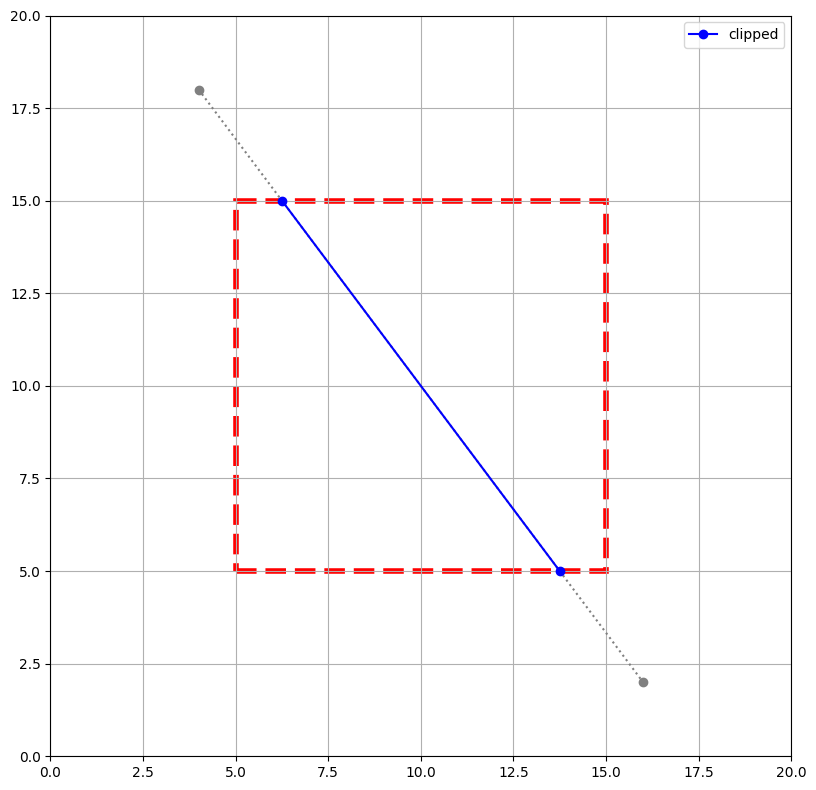

In [12]:
if __name__ == "__main__":
    CLIP_WINDOW = (5, 5, 15, 15)
    line_to_clip = (4, 18, 16, 2)
    line_title = "Single Crossing Line"
    visualize(CLIP_WINDOW, line_to_clip, line_title) 

# 4. Bresenham Line Drawing

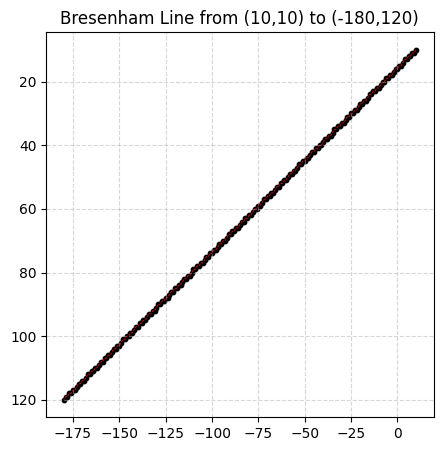

In [18]:
import matplotlib.pyplot as plt

def bresenham_line(x0, y0, x1, y1):
    points = []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy
    x, y = x0, y0

    while True:
        points.append((x, y))
        if x == x1 and y == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x += sx
        if e2 < dx:
            err += dx
            y += sy
    return points

# ---- Example: draw and plot ----
x0, y0 = 10, 10
x1, y1 = -180, 120

# Get all line points
points = bresenham_line(x0, y0, x1, y1)
xs, ys = zip(*points)

# Plot with matplotlib
plt.figure(figsize=(5, 5))
plt.scatter(xs, ys, c='black', s=10)  # plot pixels as dots
plt.plot(xs, ys, c='red', linewidth=0.5, linestyle='--')  # optional line overlay
plt.title(f"Bresenham Line from ({x0},{y0}) to ({x1},{y1})")
plt.gca().invert_yaxis()  # optional: match image coordinate system
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# 5. Fractal Geometry

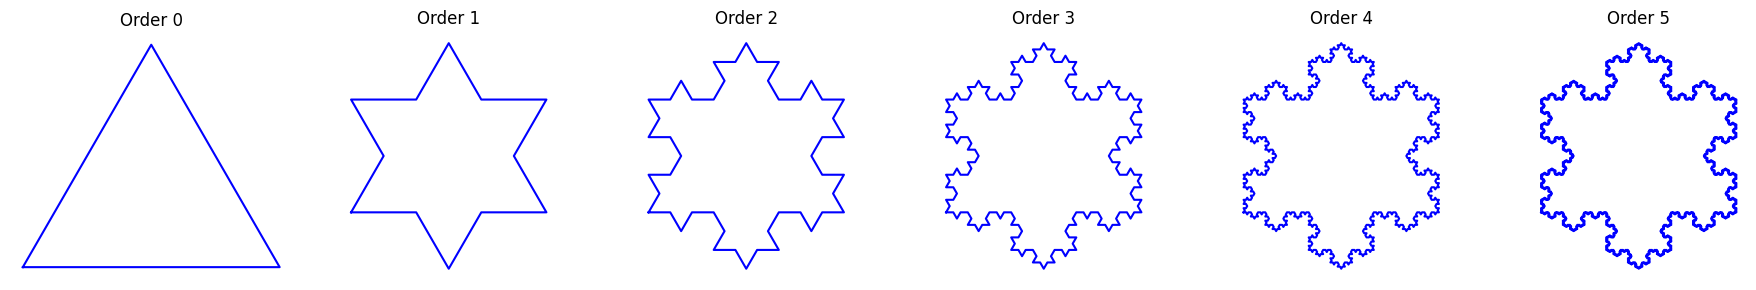

In [14]:
import matplotlib.pyplot as plt
import numpy as np

"""
Generates the points for a Koch snowflake of a given order.
"""
def initial_triangle(scale):
    """Creates the initial equilateral triangle."""
    p1 = np.array([0, 0])
    p2 = np.array([scale, 0])
    # Using sqrt(3) for the height of an equilateral triangle
    p3 = np.array([scale / 2, scale * np.sqrt(3) / 2])
    # Connect back to the start to form a closed loop for iteration
    return np.array([p1, p2, p3, p1])

def koch_iteration(points):
    """Applies one iteration of the Koch curve generation to a set of points."""
    new_points = []
    # Iterate over line segments (p1 to p2)
    for i in range(len(points) - 1):
        p1 = points[i]
        p2 = points[i+1]
        
        # Calculate the two points that divide the segment into thirds
        delta = (p2 - p1) / 3.0
        pa = p1 + delta
        pb = p1 + 2 * delta

        # Calculate the peak of the new equilateral triangle
        # This involves a 60-degree rotation of the delta vector
        angle = -np.pi / 3  # -60 degrees
        peak = pa + np.array([
            delta[0] * np.cos(angle) - delta[1] * np.sin(angle),
            delta[0] * np.sin(angle) + delta[1] * np.cos(angle)
        ])
        
        # Add the new points for this segment, excluding the last one
        new_points.extend([p1, pa, peak, pb])
        
    # Add the very last point of the original shape to close the loop
    new_points.append(points[-1])
    return np.array(new_points)

def koch_snowflake(order, scale=10):
    # Start with the initial triangle
    points = initial_triangle(scale)
    
    # Apply the iteration for the specified order
    for _ in range(order):
        points = koch_iteration(points)
        
    return points

if __name__ == "__main__":
    orders = [0, 1, 2, 3, 4, 5]
    fig, axes = plt.subplots(1, len(orders), figsize=(18, 3))

    for ax, order in zip(axes, orders):
        points = koch_snowflake(order)
        ax.plot(points[:, 0], points[:, 1], color='blue')
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f'Order {order}')
        
    plt.tight_layout()
    plt.show()


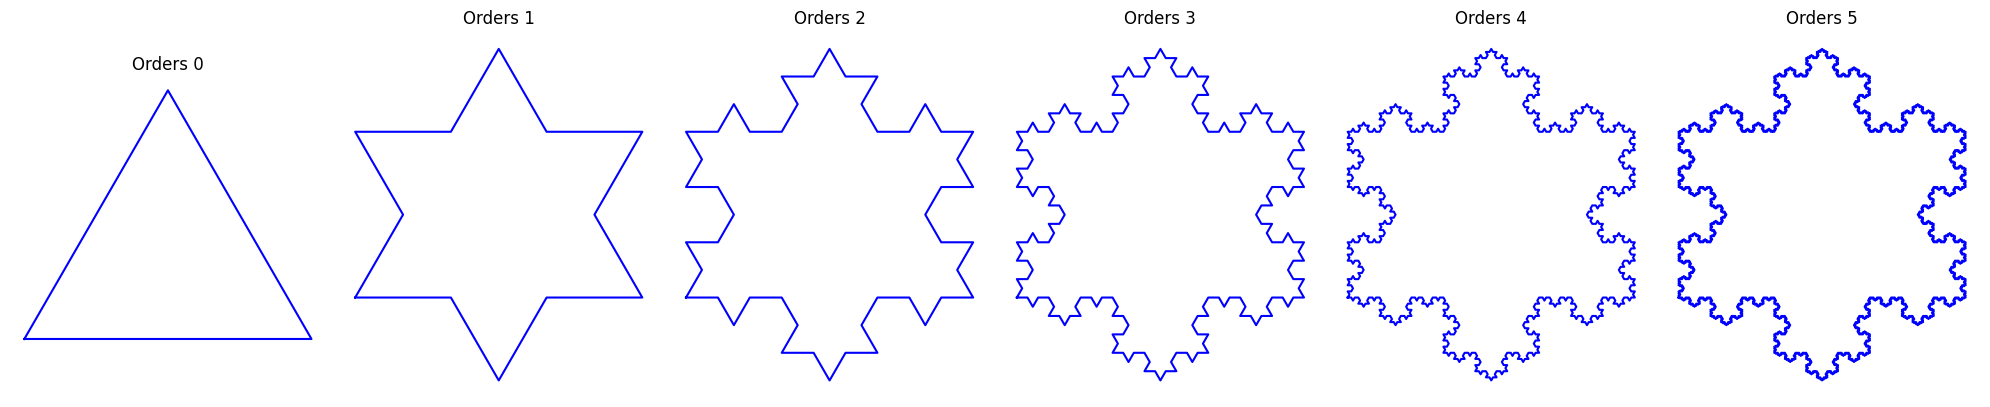

In [15]:
import matplotlib.pyplot as plt

def koch_snowflake(order, scale=10):
    def koch_initialize(scale):
        p1 = np.array([0,0])
        p2 = np.array([scale, 0])
        p3 = np.array([scale/2, scale*np.sqrt(3)/2])
        return np.array([p1,p2,p3, p1])
    def koch_iteration(points):
        new_points = []
        for i in range(len(points)-1):
            p1 = points[i]
            p2 = points[i+1]

            delta = (p2-p1)/3.0
            pa = p1+delta
            pb = p1 + 2*delta
            angle = -np.pi/3
            peak = pa + np.array([delta[0]*np.cos(angle) - delta[1]*np.sin(angle),
                             delta[0]*np.sin(angle) + delta[1]*np.cos(angle)])
            new_points.extend([p1,pa,peak,pb])
        new_points.append(points[-1])
        return np.array(new_points)
    points = koch_initialize(scale)
    for _ in range(order):
        points = koch_iteration(points)
    return points
orders = [0,1,2,3,4,5]
fig, axes = plt.subplots(1, len(orders), figsize=(20,4))
for ax, order in zip(axes, orders):
    points = koch_snowflake(order)
    ax.plot(points[:,0],points[:,1],color='blue')
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"Orders {order}")
plt.tight_layout()
plt.show()
            

# 6. Polygon Clipping

Original Polygon Vertices: [(50, 150), (200, 50), (350, 150), (100, 250), (200, 150)]
Clipped Polygon Vertices: [(100, 150.0), (100, 116.66666666666666), (124.99999999999999, 100), (275.0, 100), (300, 116.66666666666667), (300, 170.0), (225.0, 200), (150.0, 200), (200, 150)]


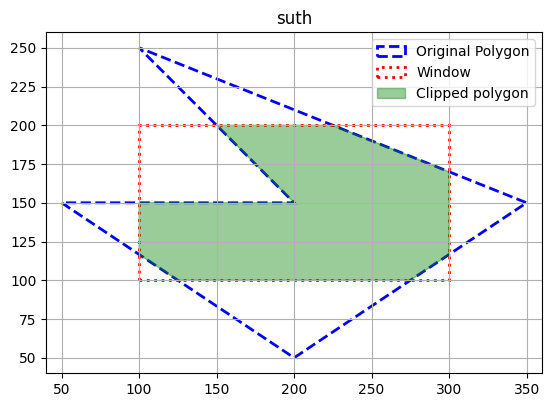

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

left, right, bottom, top = 0,1,2,3

def is_inside(p, edge, clip_window):
    x,y=p
    xmin,ymin,xmax,ymax=clip_window
    if edge==left:
        return x>=xmin
    elif edge==right:
        return x<=xmax
    elif edge==bottom:
        return y>=ymin
    elif edge==top:
        return y<=ymax
    return False
def get_intersection(p1,p2,edge,clip_window):
    x1,y1=p1
    x2,y2=p2
    xmin,ymin,xmax,ymax=clip_window

    dx = x2-x1
    dy = y2-y1

    if edge==left:
        return (xmin, y1+(y2-y1)*(xmin-x1)/(x2-x1) if dx!=0 else y1)
    elif edge==right:
        return (xmax, y1 + (y2-y1)*(xmax-x1)/(x2-x1) if dx!=0 else y1)
    elif edge==bottom:
        return (x1+(x2-x1)*(ymin-y1)/(y2-y1) if dy!=0 else x1, ymin)
    elif edge==top:
        return (x1+(x2-x1)*(ymax-y1)/(y2-y1) if dy!=0 else x1, ymax)


def clip_polygon_against_edge(subject_polygon, edge, clip_window):
    output_polygon = []
    s = subject_polygon[-1]
    for p in subject_polygon:
        if is_inside(p, edge, clip_window):
            if not is_inside(s, edge, clip_window):
                intersection = get_intersection(s,p,edge,clip_window)
                output_polygon.append(intersection)
            output_polygon.append(p)
        elif is_inside(s, edge, clip_window):
            intersection = get_intersection(s,p,edge, clip_window)
            output_polygon.append(intersection)
        s=p
    return output_polygon

def sutherland_hodgman_clip(subject_polygon, clip_window):
    clipped = list(subject_polygon)
    for edge in range(4):
        if not clipped:
            break
        clipped = clip_polygon_against_edge(clipped, edge, clip_window)
    return clipped




def plot_polygon(subject_polygon, clip_window, clip_polygon):
    fig, ax = plt.subplots()

    poly_org = patches.Polygon(subject_polygon, closed=True, edgecolor='blue', facecolor='none', linestyle='--', linewidth=2, label='Original Polygon')
    ax.add_patch(poly_org)

    xmin, ymin, xmax, ymax =clip_window

    rec = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, lw=2, edgecolor='red', facecolor='none', linestyle=':', label='Window')
    ax.add_patch(rec)
    if clip_polygon:
        poly_clipped = patches.Polygon(clip_polygon, closed=True, edgecolor='green', facecolor='green', alpha=0.4, label='Clipped polygon')
        ax.add_patch(poly_clipped)
    ax.set_title("suth")
    ax.legend()
    ax.set_aspect('equal', 'box')
    
    all_points = subject_polygon + list(zip(*[iter([xmin, ymin, xmax, ymax])]*2))
    all_x = [p[0] for p in all_points]
    all_y = [p[1] for p in all_points]
    plt.xlim(min(all_x)-10, max(all_x)+10)
    plt.ylim(min(all_y)-10, max(all_y)+10)

    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    # 1. Define the polygon to be clipped (a triangle)
    subject_polygon =  [(50 , 150) , (200 , 50) , (350 , 150) , (100 , 250) , (200 ,150) ]
    
    # 2. Define the clipping window
    clip_window = (100, 100, 300, 200) # (x_min, y_min, x_max, y_max)
    
    # 3. Perform the clipping
    clipped_polygon = sutherland_hodgman_clip(subject_polygon, clip_window)
    
    # 4. Print results and plot
    print("Original Polygon Vertices:", subject_polygon)
    print("Clipped Polygon Vertices:", clipped_polygon)
    
    plot_polygon(subject_polygon, clip_window, clipped_polygon)


# 7. Scaling, Rotation, Translation

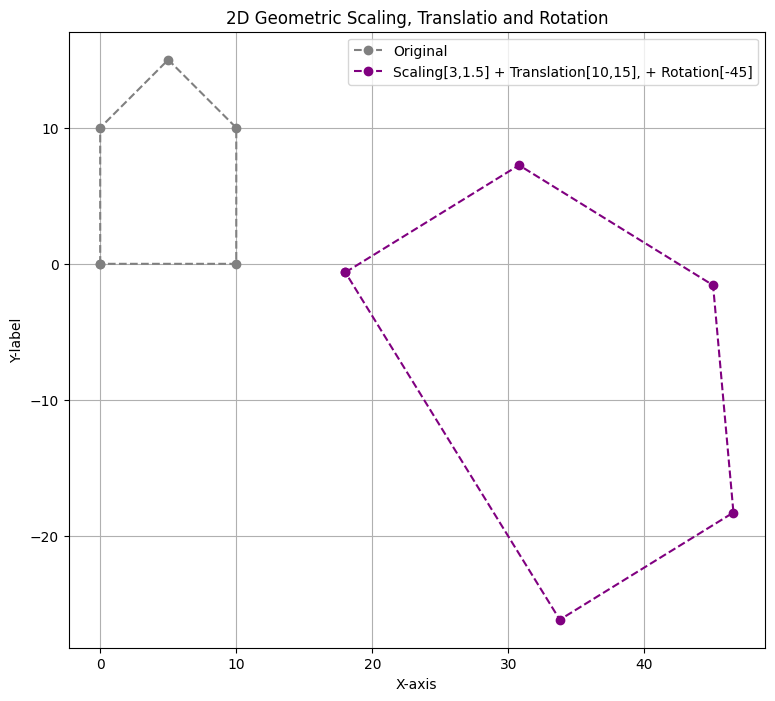

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_shape(shape, title="", color='blue'):
    plt.plot(shape[:,0], shape[:,1], color=color, marker='o', linestyle='--', label=title)

def get_translation_matrix(tx,ty):
    return np.array([
        [1,0,tx],
        [0,1,ty],
        [0,0,1]
    ])

def get_scaling_matrix(sx,sy):
    return np.array([
        [sx,0,0],
        [0,sy,0],
        [0,0,1]
    ])
def get_rotation_matrix(angle):
    cosa = np.cos(angle)
    sina = np.sin(angle)
    return np.array([
        [cosa,-sina,0],
        [sina, cosa, 0],
        [0,0,1]
    ])
def transformation(shape, matrix):
    homogeneous_shape = np.hstack([shape, np.ones((shape.shape[0],1))])
    transformed_shape = (matrix @ homogeneous_shape.T).T
    return transformed_shape[:,:2]


if __name__=="__main__":
    house_shape = np.array([
        [0,0],[0,10],[5,15],[10,10],[10,0],[0,0]
    ])
    sx,sy=3,1.5
    scaling_matrix = get_scaling_matrix(sx,sy)
    scaled_house = transformation(house_shape, scaling_matrix)

    tx,ty=10,15
    translated_matrix = get_translation_matrix(tx,ty)
    tranlated_house = transformation(scaled_house,translated_matrix)

    angles = -45
    roation_matrix = get_rotation_matrix(angles)
    rotated_house = transformation(tranlated_house, roation_matrix)

    plt.figure(figsize=(12,8))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plot_shape(house_shape,'Original','gray')
    # plot_shape(scaled_house,f"Scaled house by [{sx}, {sy}]","purple")
    # plot_shape(tranlated_house,f"Scaled house by [{tx}, {ty}]","purple")
    plot_shape(rotated_house,f"Scaling[{sx},{sy}] + Translation[{tx},{ty}], + Rotation[{angles}]","purple")

    plt.title("2D Geometric Scaling, Translatio and Rotation")
    plt.xlabel("X-axis")
    plt.ylabel("Y-label")
    plt.legend()
    plt.grid(True)
    plt.show()
